# さまざまな plot グラフ

折れ線グラフや円グラフ，棒グラフなど，いくつかの種類がありますが，どう使い分けますか？？


In [18]:
import pandas as pd
from matplotlib import pyplot as plt 

df1 = pd.read_csv('csv/score.csv')
print(df1.head())
print(df1.shape)

   age  gender  height score
0   19       1   166.9     C
1   19       0   176.8     A
2   19       0   162.1     B
3   18       1   150.3     C
4   19       1   154.6     B
(48, 4)


ここに大学生48人に

- 年齢 $age \in \{18,19\}$ 
- 性別 $gender \in \{male:0, female:1\}$ 
- 身長 $height \in \mathbb{R}>0 [{\rm cm}]$

を回答してもらい、

後ほど数学の先生が、

- 成績評価 $score \in \{A,B,C,D\}$ 

を加えたデータがある。

# 1列（1変数）

1列のデータ、すなわち１項目のアンケート結果や、１項目の測定値その分布（変数値ごとの頻度）を図示します

その変数が
- 数値データ（または順序付きカテゴリデータ）⇒ ヒストグラム`hist`
- 順序なしカテゴリデータ ⇒ 棒グラフ`bar` 

 ## 例1：１列の数値データ
 
 1列の数値データとは、以下のようなデータフレームです。

 |ID|height(cm)|
 |---|---|
 |sato|161.9|
 |suzuki|166.9|
 |takahashi|171.4|
 |inoue|156.3|
 |yamashita|167.5|
 |nakamura|149.5|

IDの列は単に対象１つ１つを区別するためのIdentificationなので、データは`height(cm)`の列のみです。また **数値が大きいと、項目名である「身長」が高い**ことを意味しています。

このようなデータは、ヒストグラムで表します。







 
  

Text(0, 0.5, 'frequency')

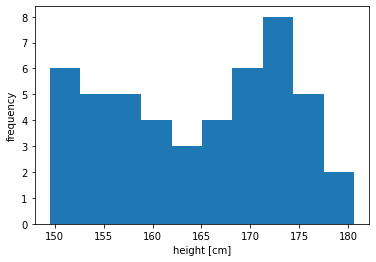

In [9]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(df1[['height']])
ax1.set_xlabel('height [cm]')
ax1.set_ylabel('frequency')

## ヒストグラムが正規分布っぽいとき

上のヒストグラムは、２つの山があるみたいで、正規分布してないようです。おそらく男女が混じっているからと思われます。男性のデータだけに絞ってヒストグラムを描いてみると、

箱ひげ図 boxcar

(array([1., 0., 0., 3., 1., 5., 7., 7., 3., 2.]),
 array([151.2 , 154.14, 157.08, 160.02, 162.96, 165.9 , 168.84, 171.78,
        174.72, 177.66, 180.6 ]),
 <BarContainer object of 10 artists>)

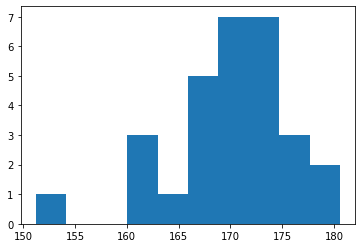

In [23]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.hist(df1[df1['gender']==0][['height']])


なんとなく正規分布していそうなので、こういう場合は箱ひげ図が有効

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff53aef4130>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5499437f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff53b0d4f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff549941700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff53aeeab20>],
 'means': []}

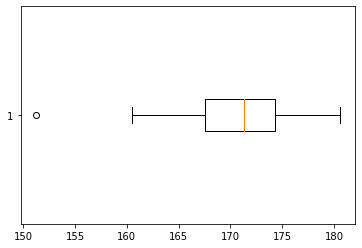

In [26]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.boxplot(df1[df1['gender']==0][['height']],vert=False)

## 例2：１列の順序なしカテゴリーデータ

`score.csv`の`gender`の列データは、男であれば0、女であれば1となっています。この数字の大きさは項目「性別」が大きい・高いということを表しておらず、順序なしカテゴリーデータであることがわかります。

この場合は、棒グラフです。見た目はヒストグラムととても似ていますが、隣り合う棒と棒がくっついていません。

＊axesクラスのplottingメソッドを使わずに、pandasのデータフレームクラスのplotメソッドを使っています。

<AxesSubplot:xlabel='gender'>

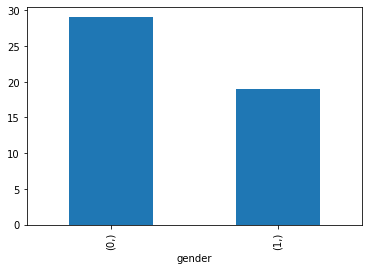

In [47]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
df1[['gender']].value_counts().plot(kind='bar',ax=ax4)

# ２つの列、X1、X2

この時は、 座標(x1,x2)にマーカーを置いていく「散布図(scatter)」を描く


<AxesSubplot:title={'center':'height'}, xlabel='[gender]'>

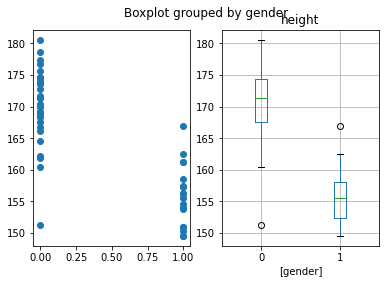

In [58]:
fig5 = plt.figure()
ax51 = fig5.add_subplot(1,2,1)
ax51.scatter(x=df1[['gender']],y=df1[['height']])
ax52 = fig5.add_subplot(1,2,2)
df1.boxplot(column=['height'],by=['gender'],ax=ax52)

第3の列の値をマーカーにするならば

<AxesSubplot:title={'center':'height'}, xlabel='[gender, age]'>

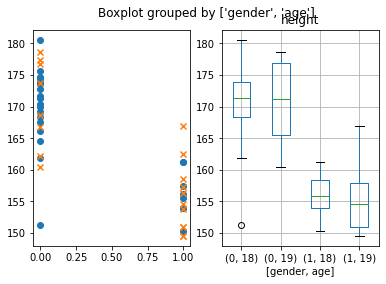

In [108]:
fig6 = plt.figure()
ax61 = fig6.add_subplot(1,2,1)
ax61.scatter(x=df1[df1['age']==18]['gender'],y=df1[df1['age']==18]['height'],marker='o')
ax61.scatter(x=df1[df1['age']==19]['gender'],y=df1[df1['age']==19]['height'],marker='x')
ax62 = fig6.add_subplot(1,2,2)
df1.boxplot(column=['height'],by=['gender','age'],ax=ax62)

# 関数の描画

関数 y = f(x) の曲線を図示するには、適当に作ったxの系列と、それに対応してf(x)で計算したyの系列を作成し、axesクラスのplotメソッドで折線グラフを描く。

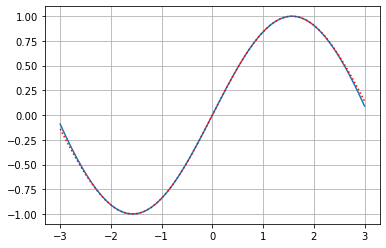

In [101]:
import numpy as np
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
x = np.linspace(-3,3,100)
# y = 1/np.sqrt(np.pi)*np.exp(-((x-1)**2)/2)
y1 = x - x**3/(3*2) + x**5/(5*4*3*2) - x**7/(7*6*5*4*3*2)
y2 = np.sin(x)
ax6.plot(x,y1)
ax6.plot(x,y2,color='red', linestyle='dotted')
ax6.grid()

# 課題

- [このデータフレーム](csv/score.csv)について，matplotlibを使って，正しいグラフをいくつか作りなさい．
- 複数のグラフ(axes)があるなら，それを1つのfigureに配置して，表示し，png形式で保存しなさい．
- 以上の「pandasによるデータフレームの読み取り」「matplotlibによるグラフ作成，表示，ファイル保存」をおこなうpythonコードを提出しなさい．